<div style="text-align: right">INFO 6106 Machine Learning Final Project</div>
<div style="text-align: right">Dino Konstantopoulos 5 April 2024</div>

# Traverse City
Traverse City is a Lake Michigan coastal city that get a lot of Lake-Effect snow.

We attempt to verify that cloud sequences are contiguous

In [1]:
import os
import pandas as pd
import numpy as np
import pickle
import ast

# Plotting libraries
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline

I think this is just winter months:

In [6]:
les = pd.read_csv(r'D:\user\docs\NU\_info6106\2006Fall_2017Spring_GOES_meteo_combined.csv')
les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    00:00  2006-09-30    00:00   
1  2006-10-01    01:00  2006-09-30    01:00   
2  2006-10-01    02:00  2006-09-30    02:00   
3  2006-10-01    03:00  2006-09-30    03:00   
4  2006-10-01    04:00  2006-09-30    04:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.0400.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...   
1  [0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...   
2  [0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...   
3  [0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...   
4  [0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...   

                                        Lake_data_2D Temp (F) RH (%)  ...  \
0  [array([   nan,    nan,    nan,    nan,    nan...       48     86  ...   
1  [array([   nan,    nan,    nan,    nan,    nan...       48     86  ...   
2  [array([nan, nan, nan, nan, nan, nan, nan, nan...       48     86  ...   
3  [array([nan, nan, nan, nan, nan, nan, nan, nan...       48     86  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...       48     89  ...   

  Low Cloud Ht (ft) Med Cloud Ht (ft) High Cloud Ht (ft) Visibility (mi)  \
0              4100              4800               7000              10   
1              6000                 m                  m              10   
2              5500             11000                  m              10   
3              6000                 m                  m              10   
4              2200              3500                  m               8   

  Atm Press (hPa) Sea Lev Press (hPa) Altimeter (hPa) Precip (in)  \
0           984.0             1007.00         1006.80        0.00   
1           983.7             1006.50         1006.40        0.00   
2           982.7             1005.70         1005.40        0.00   
3           982.0             1005.10         1004.70        0.00   
4           982.0             1004.90         1004.70        0.02   

  Wind Chill (F) Heat Index (F)  
0             45             NC  
1             44             NC  
2             45             NC  
3             44             NC  
4             46             NC  

[5 rows x 24 columns]

# EDA

In [7]:
column_names = les.columns.tolist()
print(column_names)

['Date_UTC', 'Time_UTC', 'Date_CST', 'Time_CST', 'File_name_for_1D_lake', 'File_name_for_2D_lake', 'Lake_data_1D', 'Lake_data_2D', 'Temp (F)', 'RH (%)', 'Dewpt (F)', 'Wind Spd (mph)', 'Wind Direction (deg)', 'Peak Wind Gust(mph)', 'Low Cloud Ht (ft)', 'Med Cloud Ht (ft)', 'High Cloud Ht (ft)', 'Visibility (mi)', 'Atm Press (hPa)', 'Sea Lev Press (hPa)', 'Altimeter (hPa)', 'Precip (in)', 'Wind Chill (F)', 'Heat Index (F)']


In [7]:
# Renaming
les.rename(columns={ "Temp (F)": "Temp_F", "RH (%)": "RH_pct",
                   "Dewpt (F)" : "Dewpt_F", "Wind Spd (mph)" : "Wind_Spd_mph",
                   "Wind Direction (deg)" : "Wind_Direction_deg", "Peak Wind Gust(mph)" : "Peak_Wind_Gust_mph",
                   "Low Cloud Ht (ft)" : "Low_Cloud_Ht_ft", "Med Cloud Ht (ft)" : "Med_Cloud_Ht_ft",
                   "High Cloud Ht (ft)" : "High_Cloud_Ht_ft", "Visibility (mi)" : "Visibility_mi",
                   "Atm Press (hPa)" : "Atm_Press_hPa", "Sea Lev Press (hPa)" : "Sea_Lev_Press_hPa",
                   "Altimeter (hPa)" : "Altimeter_hPa", "Precip (in)" : "Precip_in",
                   "Wind Chill (F)" : "Wind_Chill_F", "Heat Index (F)" : "Heat_Index_F",
                   } , inplace = True)

les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    00:00  2006-09-30    00:00   
1  2006-10-01    01:00  2006-09-30    01:00   
2  2006-10-01    02:00  2006-09-30    02:00   
3  2006-10-01    03:00  2006-09-30    03:00   
4  2006-10-01    04:00  2006-09-30    04:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.0000.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.0100.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.0200.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.0300.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.0400.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.0000.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.0100.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.0200.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.0300.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.0400.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.0075, 0.0025, 0.0, 0.005, 0.0, 0.005, nan, ...   
1  [0.0025, nan, 0.0025, 0.0025, nan, 0.0, nan, 0...   
2  [0.0, nan, 0.0075, nan, nan, 0.0025, nan, nan,...   
3  [0.0025, nan, 0.0025, 0.0, 0.0075, nan, 0.005,...   
4  [0.0025, nan, 0.0, nan, 0.0075, 0.0, nan, nan,...   

                                        Lake_data_2D Temp_F RH_pct  ...  \
0  [array([   nan,    nan,    nan,    nan,    nan...     48     86  ...   
1  [array([   nan,    nan,    nan,    nan,    nan...     48     86  ...   
2  [array([nan, nan, nan, nan, nan, nan, nan, nan...     48     86  ...   
3  [array([nan, nan, nan, nan, nan, nan, nan, nan...     48     86  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...     48     89  ...   

  Low_Cloud_Ht_ft Med_Cloud_Ht_ft High_Cloud_Ht_ft Visibility_mi  \
0            4100            4800             7000            10   
1            6000               m                m            10   
2            5500           11000                m            10   
3            6000               m                m            10   
4            2200            3500                m             8   

  Atm_Press_hPa Sea_Lev_Press_hPa Altimeter_hPa Precip_in Wind_Chill_F  \
0         984.0           1007.00       1006.80      0.00           45   
1         983.7           1006.50       1006.40      0.00           44   
2         982.7           1005.70       1005.40      0.00           45   
3         982.0           1005.10       1004.70      0.00           44   
4         982.0           1004.90       1004.70      0.02           46   

  Heat_Index_F  
0           NC  
1           NC  
2           NC  
3           NC  
4           NC  

[5 rows x 24 columns]

#### Missing value handling in dataframe
- As per the abbr in the table:
    - `m` or `M`: Data is missing
    - `NC`: Wind Chill/Heat Index do not meet the required thresholds to be calculated

Replace the missing values with 0.

In [8]:
# Replace with 0
les = les.replace(['m', 'M'], '0')

#### Drop **Wind_Chill_F** and **Heat_Index_F** due to a large number of NC values

In [9]:
les = les.drop(['Wind_Chill_F', 'Heat_Index_F'], axis=1)
les = les.reset_index(drop=True)

In [10]:
def missing_values(df):
    total_null = df.isna().sum()
    percent_null = total_null / df.count() # Total count of null values / Total count of values
    missing_data = pd.concat([total_null, percent_null], axis = 1, keys = ['Total Null', 'Percentage Null'])
    return missing_data

missing_values(les)

Total Null  Percentage Null
Date_UTC                        0         0.000000
Time_UTC                        0         0.000000
Date_CST                        0         0.000000
Time_CST                        0         0.000000
File_name_for_1D_lake           0         0.000000
File_name_for_2D_lake           0         0.000000
Lake_data_1D                    0         0.000000
Lake_data_2D                    0         0.000000
Temp_F                        239         0.004991
RH_pct                        239         0.004991
Dewpt_F                       239         0.004991
Wind_Spd_mph                  239         0.004991
Wind_Direction_deg            239         0.004991
Peak_Wind_Gust_mph            239         0.004991
Low_Cloud_Ht_ft               239         0.004991
Med_Cloud_Ht_ft               239         0.004991
High_Cloud_Ht_ft              239         0.004991
Visibility_mi                 239         0.004991
Atm_Press_hPa                 239         0.004991
Sea_Lev_Press_hPa             239         0.004991
Altimeter_hPa                 239         0.004991
Precip_in                     239         0.004991

Dropping null values:

In [11]:
les = les.dropna()
print('Total observation count after missing value treatment: ', len(les))

Total observation count after missing value treatment:  47882


>**Note to self**: Next run, replace NA with 0 because we may actually have erased too many records by dropping NAs...

#### Changing Datatype

In [12]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47882 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Date_UTC               47882 non-null  object
 1   Time_UTC               47882 non-null  object
 2   Date_CST               47882 non-null  object
 3   Time_CST               47882 non-null  object
 4   File_name_for_1D_lake  47882 non-null  object
 5   File_name_for_2D_lake  47882 non-null  object
 6   Lake_data_1D           47882 non-null  object
 7   Lake_data_2D           47882 non-null  object
 8   Temp_F                 47882 non-null  object
 9   RH_pct                 47882 non-null  object
 10  Dewpt_F                47882 non-null  object
 11  Wind_Spd_mph           47882 non-null  object
 12  Wind_Direction_deg     47882 non-null  object
 13  Peak_Wind_Gust_mph     47882 non-null  object
 14  Low_Cloud_Ht_ft        47882 non-null  object
 15  Med_Cloud_Ht_ft    

In [13]:
# Using apply method
columns = les.columns
les[columns[8:]] = les[columns[8:]].apply(pd.to_numeric, errors='coerce')

In [14]:
les.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47882 entries, 0 to 48120
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date_UTC               47882 non-null  object 
 1   Time_UTC               47882 non-null  object 
 2   Date_CST               47882 non-null  object 
 3   Time_CST               47882 non-null  object 
 4   File_name_for_1D_lake  47882 non-null  object 
 5   File_name_for_2D_lake  47882 non-null  object 
 6   Lake_data_1D           47882 non-null  object 
 7   Lake_data_2D           47882 non-null  object 
 8   Temp_F                 47882 non-null  float64
 9   RH_pct                 47882 non-null  float64
 10  Dewpt_F                47882 non-null  float64
 11  Wind_Spd_mph           47882 non-null  int64  
 12  Wind_Direction_deg     47882 non-null  int64  
 13  Peak_Wind_Gust_mph     47882 non-null  int64  
 14  Low_Cloud_Ht_ft        47882 non-null  int64  
 15  Me

#### Dropping data for the night-time
We focus on data from **14:00 UTC to 21:00 UTC**, when there is enough sunlight to generate reflections and capture useful information. This time window provides valid data for the experiment and can be used to extract important insights from Lake Michigan and its surrounding areas.

`14:00 UTC is 10:00am EST and 21:00 UTC is 5:00pm EST.`

In [15]:
filtered_les = les.loc[(les['Time_UTC'] >= '14:00')
                     & (les['Time_UTC'] <= '21:00')]
filtered_les

Date_UTC Time_UTC    Date_CST Time_CST  \
14     2006-10-01    14:00  2006-10-01    14:00   
15     2006-10-01    15:00  2006-10-01    15:00   
16     2006-10-01    16:00  2006-10-01    16:00   
17     2006-10-01    17:00  2006-10-01    17:00   
18     2006-10-01    18:00  2006-10-01    18:00   
...           ...      ...         ...      ...   
48114  2015-03-31    17:00  2015-03-31    17:00   
48115  2015-03-31    18:00  2015-03-31    18:00   
48116  2015-03-31    19:00  2015-03-31    19:00   
48117  2015-03-31    20:00  2015-03-31    20:00   
48118  2015-03-31    21:00  2015-03-31    21:00   

                           File_name_for_1D_lake  \
14     goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
15     goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
16     goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
17     goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
18     goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
...                                          ...   
48114  goes15.2015.03.31.1700.v01.nc-var1-t0.csv   
48115  goes15.2015.03.31.1800.v01.nc-var1-t0.csv   
48116  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
48117  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
48118  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
14     T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
15     T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
16     T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
17     T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
18     T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
...                                                ...   
48114  T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv   
48115  T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv   
48116  T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv   
48117  T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv   
48118  T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv   

                                            Lake_data_1D  \
14     [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
15     [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
16     [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
17     [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
18     [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   
...                                                  ...   
48114  [0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...   
48115  [0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...   
48116  [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...   
48117  [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...   
48118  [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...   

                                            Lake_data_2D  Temp_F  RH_pct  ...  \
14     [array([       nan,        nan,        nan,   ...    60.0    49.0  ...   
15     [array([       nan,        nan,        nan,   ...    60.0    47.0  ...   
16     [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0  ...   
17     [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0  ...   
18     [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0  ...   
...                                                  ...     ...     ...  ...   
48114  [array([   nan,    nan,    nan,    nan,    nan...    39.0    54.0  ...   
48115  [array([   nan,    nan,    nan,    nan,    nan...    37.0    61.0  ...   
48116  [array([       nan,        nan,        nan,   ...    37.0    66.0  ...   
48117  [array([   nan,    nan,    nan,    nan,    nan...    36.0    85.0  ...   
48118  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    36.0    85.0  ...   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
14                    270                   0             3600   
15                      0                   0                0   
16                     40                   0                0   
17                      0                   0                0   
18                      0                   0     

In [16]:
filtered_les = filtered_les.reset_index(drop=True)
filtered_les.head()

Date_UTC Time_UTC    Date_CST Time_CST  \
0  2006-10-01    14:00  2006-10-01    14:00   
1  2006-10-01    15:00  2006-10-01    15:00   
2  2006-10-01    16:00  2006-10-01    16:00   
3  2006-10-01    17:00  2006-10-01    17:00   
4  2006-10-01    18:00  2006-10-01    18:00   

                       File_name_for_1D_lake  \
0  goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.1800.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1  [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2  [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3  [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4  [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   

                                        Lake_data_2D  Temp_F  RH_pct  ...  \
0  [array([       nan,        nan,        nan,   ...    60.0    49.0  ...   
1  [array([       nan,        nan,        nan,   ...    60.0    47.0  ...   
2  [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0  ...   
3  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0  ...   
4  [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0  ...   

   Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0                 270                   0             3600                0   
1                   0                   0                0                0   
2                  40                   0                0                0   
3                   0                   0                0                0   
4                   0                   0             8000                0   

   High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0                 0             10          994.7             1017.8   
1                 0             10          994.7             1017.7   
2                 0             10          994.7             1017.8   
3                 0             10          994.7             1017.8   
4                 0             10          994.7             1017.9   

   Altimeter_hPa  Precip_in  
0         1017.6        0.0  
1         1017.6        0.0  
2         1017.6        0.0  
3         1017.6        0.0  
4         1017.6        0.0  

[5 rows x 22 columns]

In [17]:
# Summary
filtered_les.describe()

Temp_F        RH_pct       Dewpt_F  Wind_Spd_mph  \
count  15959.000000  15959.000000  15959.000000  15959.000000   
mean      34.931261     68.740335     25.234351      7.137039   
std       14.344283     14.927241     13.538403      5.093937   
min      -15.000000      0.000000    -20.000000      0.000000   
25%       25.000000     59.000000     16.000000      3.000000   
50%       34.000000     70.000000     25.000000      7.000000   
75%       44.000000     80.000000     34.000000     10.000000   
max       88.000000    100.000000     66.000000     34.000000   

       Wind_Direction_deg  Peak_Wind_Gust_mph  Low_Cloud_Ht_ft  \
count        15959.000000        15959.000000     15959.000000   
mean           158.714832            4.500971      4563.800363   
std            128.081797            9.510925      5747.505620   
min              0.000000            0.000000         0.000000   
25%              0.000000            0.000000      1500.000000   
50%            190.000000            0.000000      2700.000000   
75%            270.000000            0.000000      4500.000000   
max            360.000000           52.000000     28000.000000   

       Med_Cloud_Ht_ft  High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  \
count     15959.000000      15959.000000   15959.000000   15959.000000   
mean       3457.098816       1033.362993       8.174698     990.931687   
std        6318.061684       3981.234855       3.033164      41.719389   
min           0.000000          0.000000       0.000000       0.000000   
25%           0.000000          0.000000       7.000000     987.000000   
50%           0.000000          0.000000      10.000000     993.300000   
75%        4000.000000          0.000000      10.000000     999.000000   
max       25000.000000      26000.000000      10.000000    1018.900000   

       Sea_Lev_Press_hPa  Altimeter_hPa     Precip_in  
count       15959.000000   15959.000000  15959.000000  
mean          960.019663    1014.892355      0.002377  
std           232.924553      26.926521      0.016545  
min             0.000000       0.000000      0.000000  
25%          1009.500000    1009.800000      0.000000  
50%          1016.400000    1016.300000      0.000000  
75%          1022.500000    1022.000000      0.000000  
max          1043.600000    1042.300000      0.860000

In [18]:
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])

Total observations:  15959
Total number of features:  22


In [8]:
data_sample = les['Lake_data_1D'][16]
data_sample

'[0.0725, 0.067499995, 0.07, 0.07, 0.067499995, 0.067499995, 0.065, 0.067499995, 0.07, 0.0625, 0.0625, 0.06, 0.0625, 0.055, 0.067499995, 0.055, 0.065, 0.07, 0.065, 0.0725, 0.0775, 0.0625, 0.067499995, 0.0625, 0.065, 0.067499995, 0.0625, 0.0625, 0.06, 0.0625, 0.0625, 0.065, 0.06, 0.06, 0.0625, 0.0625, 0.067499995, 0.067499995, 0.067499995, 0.067499995, 0.0775, 0.074999996, 0.067499995, 0.065, 0.049999997, 0.049999997, 0.067499995, 0.067499995, 0.055, 0.055, 0.0725, 0.067499995, 0.065, 0.0625, 0.065, 0.0625, 0.065, 0.057499997, 0.065, 0.0725, 0.0625, 0.0625, 0.065, 0.07, 0.067499995, 0.0625, 0.057499997, 0.055, 0.0625, 0.074999996, 0.055, 0.06, 0.0625, 0.067499995, 0.057499997, 0.0625, 0.067499995, 0.065, 0.057499997, 0.065, 0.0625, 0.0625, 0.067499995, 0.06, 0.0625, 0.067499995, 0.065, 0.085, 0.067499995, 0.082499996, 0.057499997, 0.0625, 0.055, 0.06, 0.067499995, 0.057499997, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.055, 0.065, 0.0625, 0.0625, 0.06, 0.067499995, 0.057499997, 0.06749

# Cloud Imagery

In [19]:
def arrays_2_png(lat, lon, val, fig_name):
    status_code = -1
    # Here it starts
    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.colorbar(orientation='vertical')
        plt.savefig('D:/user/docs/NU/_Noctis/lake-michigan-images/' + fig_name + '.png')
        status_code = 0
    else:
        status_code = 255

    return status_code

In [20]:
df_lat_lon = df_lat_lon = pd.read_csv(
    r'D:\user\docs\NU\_Noctis\data\lat_long_1D_labels_for_plotting.csv')
df_lat_lon.head(5)

latitude  longitude
0     41.78     -87.54
1     41.78     -87.50
2     41.78     -87.46
3     41.78     -87.42
4     41.78     -87.38

In [21]:
df_lat_lon.shape

(3599, 2)

In [22]:
lat_lst = df_lat_lon['latitude'].to_list()
lon_lst = df_lat_lon['longitude'].to_list()

In [48]:
data_sample = filtered_les['Lake_data_1D'][16]
data_sample

'[0.1575, 0.1375, 0.13, 0.1325, 0.1325, 0.1275, 0.13, 0.1275, 0.13499999, 0.1275, 0.1525, 0.22, 0.19749999, 0.155, 0.1375, 0.1525, 0.1425, 0.1475, 0.16, 0.13499999, 0.1325, 0.125, 0.114999995, 0.1275, 0.125, 0.145, 0.1425, 0.1325, 0.16499999, 0.1925, 0.19749999, 0.17, 0.14999999, 0.13499999, 0.16499999, 0.16, 0.16499999, 0.16499999, 0.1725, 0.21, 0.13499999, 0.1375, 0.1325, 0.122499995, 0.1275, 0.114999995, 0.122499995, 0.1275, 0.13499999, 0.1525, 0.16749999, 0.12, 0.14, 0.13, 0.1325, 0.13, 0.16, 0.155, 0.1625, 0.175, 0.16, 0.205, 0.17, 0.1475, 0.16499999, 0.1525, 0.13, 0.12, 0.1375, 0.1325, 0.1475, 0.175, 0.2025, 0.1275, 0.1175, 0.1275, 0.1325, 0.13499999, 0.13, 0.1375, 0.1475, 0.16749999, 0.1725, 0.18249999, 0.195, 0.1475, 0.1325, 0.122499995, 0.175, 0.1525, 0.16499999, 0.1425, 0.13499999, 0.1325, 0.13499999, 0.1475, 0.145, 0.13, 0.1275, 0.1175, 0.114999995, 0.1275, 0.13, 0.1325, 0.1275, 0.1275, 0.1325, 0.1625, 0.19999999, 0.1525, 0.16749999, 0.1375, 0.14, 0.11, 0.14999999, 0.1475, 0

In [49]:
data_sample2 = filtered_les['Lake_data_2D'][16]
data_sample2

'[array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan, 0.37,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,\n        nan,  nan,  nan,  nan,  nan,  nan]), array([       nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              nan,        nan,        nan,        nan,        nan,\n              n

# 1D data conversion 

In [50]:
import ast

data_sample_lst = ast.literal_eval(data_sample)
data_sample_lst[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [51]:
ldata_sample = data_sample.strip('][').split(', ')
ldata_sample[0:10]

['0.1575',
 '0.1375',
 '0.13',
 '0.1325',
 '0.1325',
 '0.1275',
 '0.13',
 '0.1275',
 '0.13499999',
 '0.1275']

In [52]:
data_sample_lst2 = [float(el) for el in ldata_sample]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [53]:
data_sample_lst2 = [float(el) for el in filtered_les['Lake_data_1D'][16].strip('][').split(', ')]
data_sample_lst2[0:10]

[0.1575,
 0.1375,
 0.13,
 0.1325,
 0.1325,
 0.1275,
 0.13,
 0.1275,
 0.13499999,
 0.1275]

In [54]:
data_sample_lst == data_sample_lst2

True

# Plotting 1D data

0

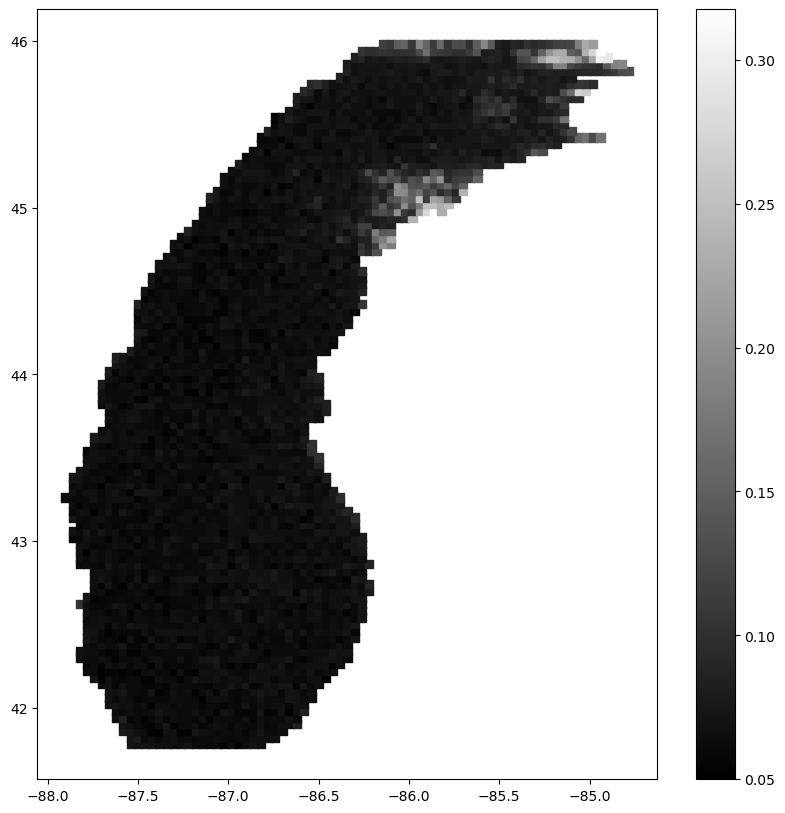

In [34]:
arrays_2_png(lat_lst, lon_lst, data_sample_lst, 'sample')

# goes11.2008.11.03.1600

In [56]:
filtered_les.loc[5177]

Date_UTC                                                        2008-01-10
Time_UTC                                                             16:00
Date_CST                                                        2008-01-10
Time_CST                                                             16:00
File_name_for_1D_lake            goes11.2008.01.10.1600.v01.nc-var1-t0.csv
File_name_for_2D_lake      T_goes11.2008.01.10.1600.v01.nc-var1-t0.csv.csv
Lake_data_1D             [0.2375, 0.2325, 0.22749999, 0.255, 0.24749999...
Lake_data_2D             [array([       nan,        nan,        nan,   ...
Temp_F                                                                36.0
RH_pct                                                                58.0
Dewpt_F                                                               23.0
Wind_Spd_mph                                                             8
Wind_Direction_deg                                                      80
Peak_Wind_Gust_mph       

0

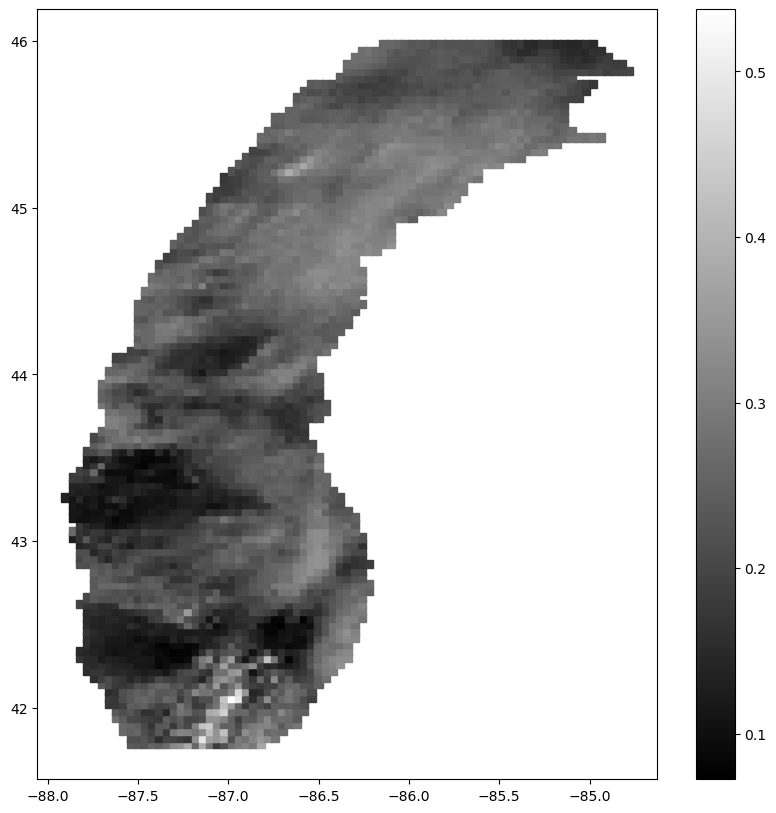

In [88]:
arrays_2_png(lat_lst, lon_lst, ast.literal_eval(filtered_les['Lake_data_1D'][5177]), 'sample')

In [58]:
les['Lake_data_1D'][5177].strip('][').split(', ')

['0.1025',
 '0.095',
 '0.095',
 '0.089999996',
 '0.082499996',
 '0.095',
 '0.0875',
 '0.082499996',
 '0.082499996',
 '0.095',
 '0.082499996',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.089999996',
 '0.095',
 '0.095',
 '0.1025',
 '0.1025',
 '0.085',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0925',
 '0.085',
 '0.082499996',
 '0.089999996',
 '0.082499996',
 '0.0775',
 '0.0875',
 '0.089999996',
 '0.0775',
 '0.0775',
 '0.085',
 '0.0725',
 '0.089999996',
 '0.0875',
 '0.1025',
 '0.0875',
 '0.0975',
 '0.0925',
 '0.0875',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.082499996',
 '0.082499996',
 '0.0925',
 '0.0875',
 '0.085',
 '0.0925',
 '0.082499996',
 '0.0875',
 '0.085',
 '0.0875',
 '0.0875',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.085',
 '0.089999996',
 '0.095',
 '0.105',
 '0.0925',
 '0.082499996',
 '0.089999996',
 '0.089999996',
 '0.089999996',
 '0.08',
 '0.085',
 '0.0775',
 '0.08',
 '0.0875',
 '0.08',
 '0.082499996',
 '0.074999996',
 '0.067499995',
 '0.

In [60]:
def rectify(crap_string):
    return [0.0 if el == 'nan' else float(el) for el in crap_string.strip('][').split(', ')]

0

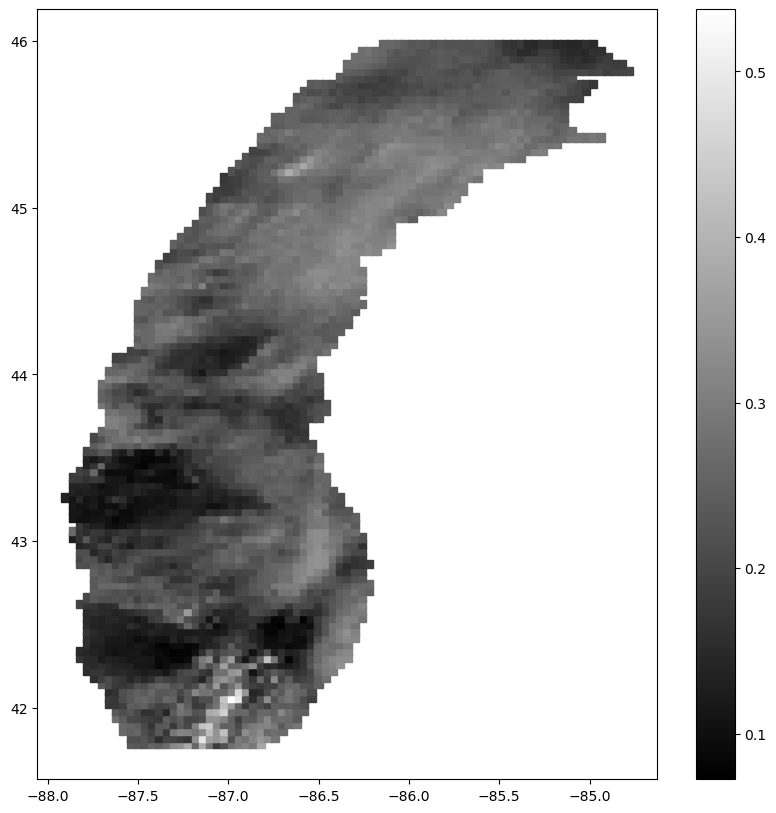

In [87]:
arrays_2_png(lat_lst, lon_lst, 
             [0.0 if el == 'nan' else float(el) for el in filtered_les['Lake_data_1D'][5177].strip('][').split(', ')], 
             'sample')

0

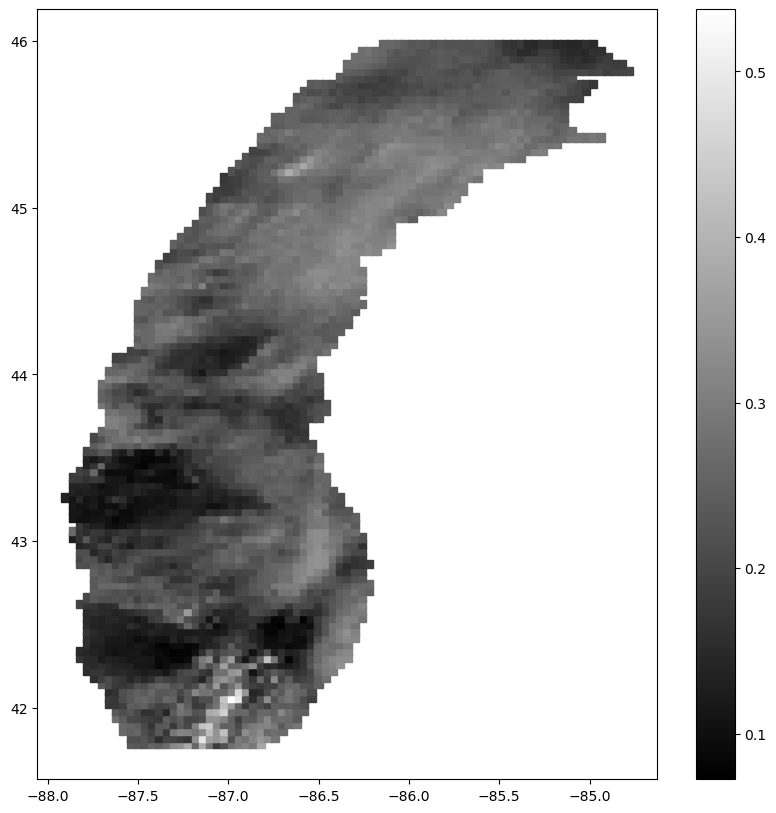

In [63]:
arrays_2_png(lat_lst, lon_lst, 
             rectify(filtered_les['Lake_data_1D'][5177]), 
             'sample')

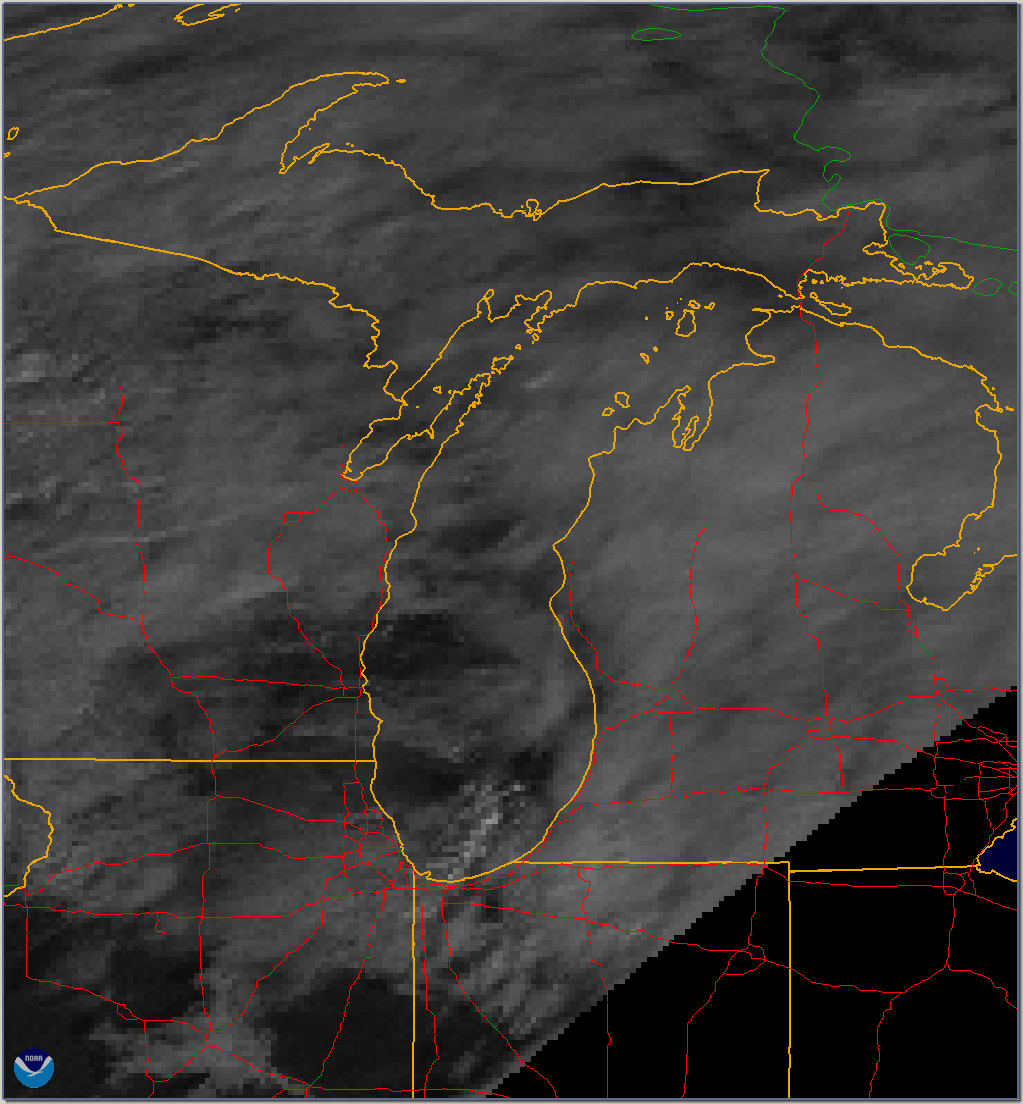

In [66]:
from IPython.display import Image
Image("D:/user/docs/NU/_Noctis/original-images/goes11.2008.01.10.1600.v01.nc.png")

Ok, this looks good.

# Image generation
We will generate 64 $\times$ 64 images for each daytime Cloud frame.

The images are pretty large and take up a lot of memory and processing time for the network, so we resize them into 64 x 64 pixels. Then, we convert the images into grayscale and save them for training. 

The function below removes the colormap and axis, so that clean images can be stored to train the models:

In [76]:
# Remove the colormap and axis to clean images
def arrays_2_png_data(lat, lon, val, fig_name):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(f'D:/user/docs/NU/_Noctis/lake-michigan-images/' + fig_name +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

A small test first:

In [77]:
for i, row in les.iterrows():
    if i == 10:
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        print(arr)
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
        break

[0.012499999, 0.0075, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.01, 0.005, 0.01, 0.0075, 0.0075, 0.0175, 0.012499999, 0.012499999, 0.01, 0.012499999, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.012499999, 0.015, 0.0025, 0.01, 0.015, 0.0025, 0.012499999, 0.01, 0.015, 0.022499999, 0.012499999, 0.015, 0.0075, 0.0025, 0.02, 0.015, 0.0075, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.01, 0.0025, 0.0175, 0.0175, 0.012499999, 0.012499999, 0.01, 0.0025, 0.005, 0.015, 0.012499999, 0.01, 0.012499999, 0.0075, 0.02, 0.01, 0.01, 0.01, 0.01, 0.0175, 0.005, 0.012499999, 0.0075, 0.015, 0.012499999, 0.0075, 0.012499999, 0.012499999, 0.0075, 0.02, 0.0075, 0.01, 0.015, 0.0175, 0.012499999, 0.012499999, 0.0025, 0.0075, 0.012499999, 0.0175, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.005, 0.015, 0.012499999, 0.012499999, 0.022499999, 0.012499999, 0.0175, 0.0075, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.012499999, 0.01, 0.015, 0.012499999, 0.015, 0.015, 0.0

OK, this works. Let's read in the 1D column and serialize lake Michigan clouds:

In [78]:
from tqdm import tqdm
for i, row in tqdm(les.iterrows()):
    if i == 100:
        break

100it [00:00, 4545.83it/s]


In [79]:
from tqdm import tqdm
for i, row in tqdm(filtered_les.iterrows()):

    try:
        #arr = np.array(eval(row.Lake_data_1D))
        arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
        arrays_2_png_data(lat_lst, lon_lst, arr, str(i))
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row:", i)

15959it [42:03,  6.32it/s]


Interesting... Looking at the folder, images around image #12921 are very incomplete. Memory issue? Let
stry regenerating that image:

In [80]:
for i, row in tqdm(les.iterrows()):
    try:
        if 12921 == i:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data(lat_lst, lon_lst, arr, 'sample')
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [00:02, 16684.09it/s]


Yes, that worked! So, it is *likely* a this notebook's memory issue!

Looking at the containing folder, it looks like images from image #10127 to image #13046 are corrupt!

Let's regenerate these in a separate folder:

In [81]:
def arrays_2_png_data_regen(lat, lon, val, fig_name, folder_name):
    status_code = -1

    if len(lat) == len(lon) == len(val):
        plt.figure(figsize=(10, 10))
        plt.scatter(lon, lat, c=val, cmap=cm.gray, marker='s')
        plt.axis('off')
        plt.savefig(folder_name + '/' + fig_name +'.png')
        plt.close()
        status_code = 0
    else:
        status_code = 255

    return status_code

In [82]:
for i, row in tqdm(les.iterrows()):
    try:
        if 10127 <= i <= 13046:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data_regen(lat_lst, lon_lst, arr, str(i), "D:/user/docs/NU/_Noctis/lake-michigan-images-regen")
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [07:59, 99.77it/s]   


Examining the regeneration folder, most of the images look suspiciously like brown noise. For example, image #12969. Let's regenerate that one to verify:

In [83]:
for i, row in tqdm(les.iterrows()):
    try:
        if i == 12969:
            #arr = np.array(eval(row.Lake_data_1D))
            arr = [0.0 if el == 'nan' else float(el) for el in row.Lake_data_1D.strip('][').split(', ')]
            arrays_2_png_data_regen(lat_lst, lon_lst, arr, 'sample', "D:/user/docs/NU/_Noctis/lake-michigan-images-regen")
    except: # If no data is available (fill with zeros)
        #txt = row.Lake_data_1D
        #txt = txt.replace('nan', '0')
        #arr = np.array(eval(txt))
        print("oopsie at row", str(i))

47882it [00:01, 35208.51it/s]


Yup, `sample` looks exactly lime image #12969 in the regenerating folder. 

Note the missing filename and missing data:

In [84]:
filtered_les.loc[12969]

Date_UTC                                                        2012-03-22
Time_UTC                                                             16:00
Date_CST                                                        2012-03-22
Time_CST                                                             16:00
File_name_for_1D_lake                                                 None
File_name_for_2D_lake                                                 None
Lake_data_1D             [nan, nan, nan, nan, nan, nan, nan, nan, nan, ...
Lake_data_2D                                                         [nan]
Temp_F                                                                75.0
RH_pct                                                                51.0
Dewpt_F                                                               56.0
Wind_Spd_mph                                                            10
Wind_Direction_deg                                                     100
Peak_Wind_Gust_mph       

In [85]:
filtered_les['Lake_data_1D'][12969]

'[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan

So, appears to be a missing data issue?

When `File_name_for_1D_lake == None`, that means there is no image data, but we keep the meteo data.

So let's use this band of missing data as the separation between the training set and the validation set!

Note to myself: IN order to always ensure that data is not corrupt:

- For *each meteo city*, produce a combined csv just like Traverse City.

- Then, run logic that goes over *every row* and verifies that the image filename is not null *and* that the 1D data is not made out of a majority of nans.

- Then, randomly select 100 rows over the entire dataset and produce a 100-row 2-column image collection that plots lake Michigan cloud cover on the right and the original satellite image on the right.

We need to be able to scan all 100 images and verify that the cloud covers match.

I copy contents of folder `D:\user\docs\NU\_Noctis\lake-michigan-images-regen` into folder `D:\user\docs\NU\_Noctis\lake-michigan-images`.

# Removing the 255-level padding around Lake Michigan
We need to do this *before* we resize the images to 64 $\times$ 64, otherwise we will get artificial aliasing around the lake MIchigan coastline, which will look like spurious Cloud intensity around the coastline!

We know that image #39 is corrupt: all black. It should give us the shape of Lake Michigan!

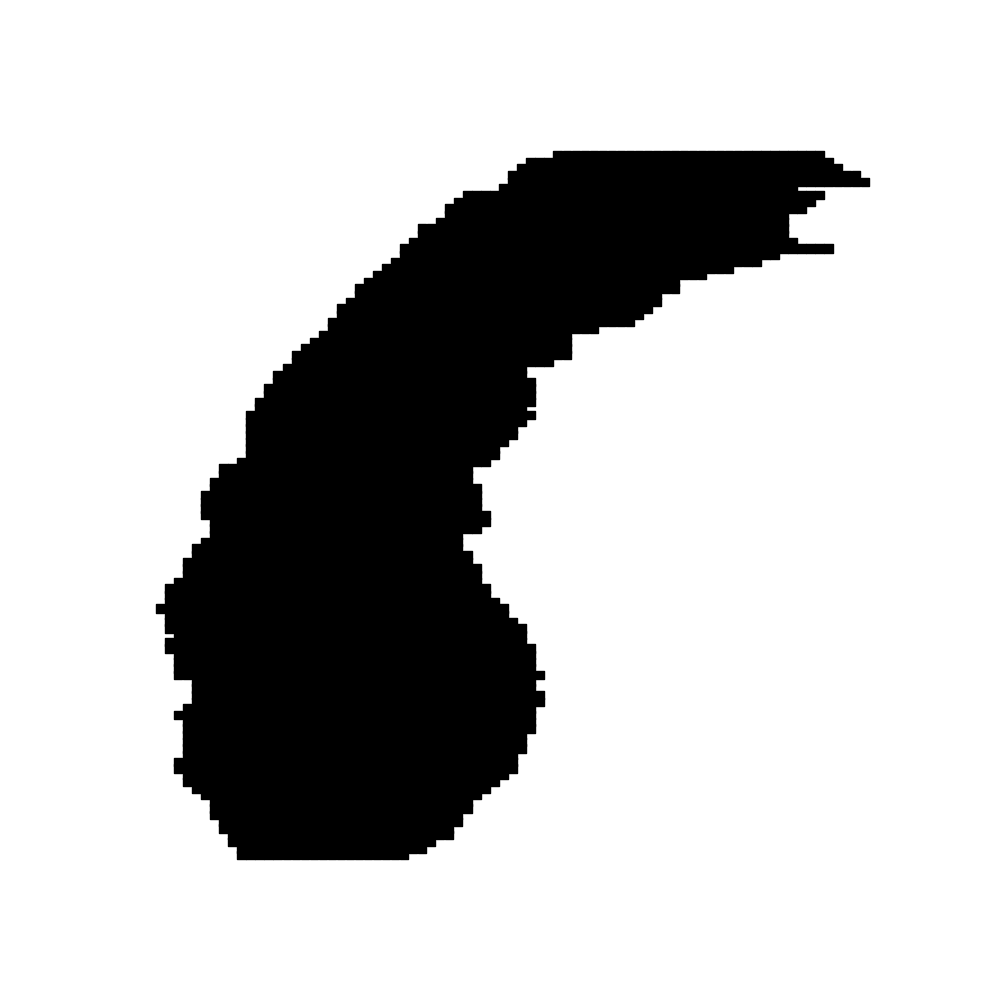

In [192]:
from PIL import Image, ImageOps

img = Image.open('D:/user/docs/NU/_Noctis/lake-michigan-images/39.png')
img

Let's create a mask that is all ones *over* lake Michigan, and all zeros over land:

In [193]:
#full = np.full(img.size, 255)
img = ImageOps.grayscale(img)
#mask = (full - img).astype(np.uint8)
#mask = (0 < mask).astype(int)
img = np.asarray(img)
mask = (255 != img).astype(int)
np.nonzero(mask)

(array([150, 150, 150, ..., 860, 860, 860], dtype=int64),
 array([553, 554, 555, ..., 406, 407, 408], dtype=int64))

In [194]:
(mask * 255)[150, 553], (mask * 255)[860, 408]

(255, 255)

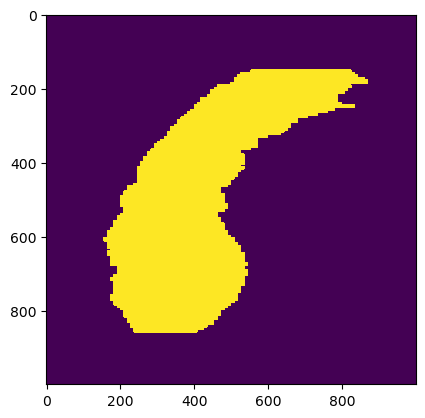

In [211]:
plt.imshow(mask * 255, interpolation='none')
plt.show()

Now let's see what Image #6 should really look like, without the spurious full-intensity over land:

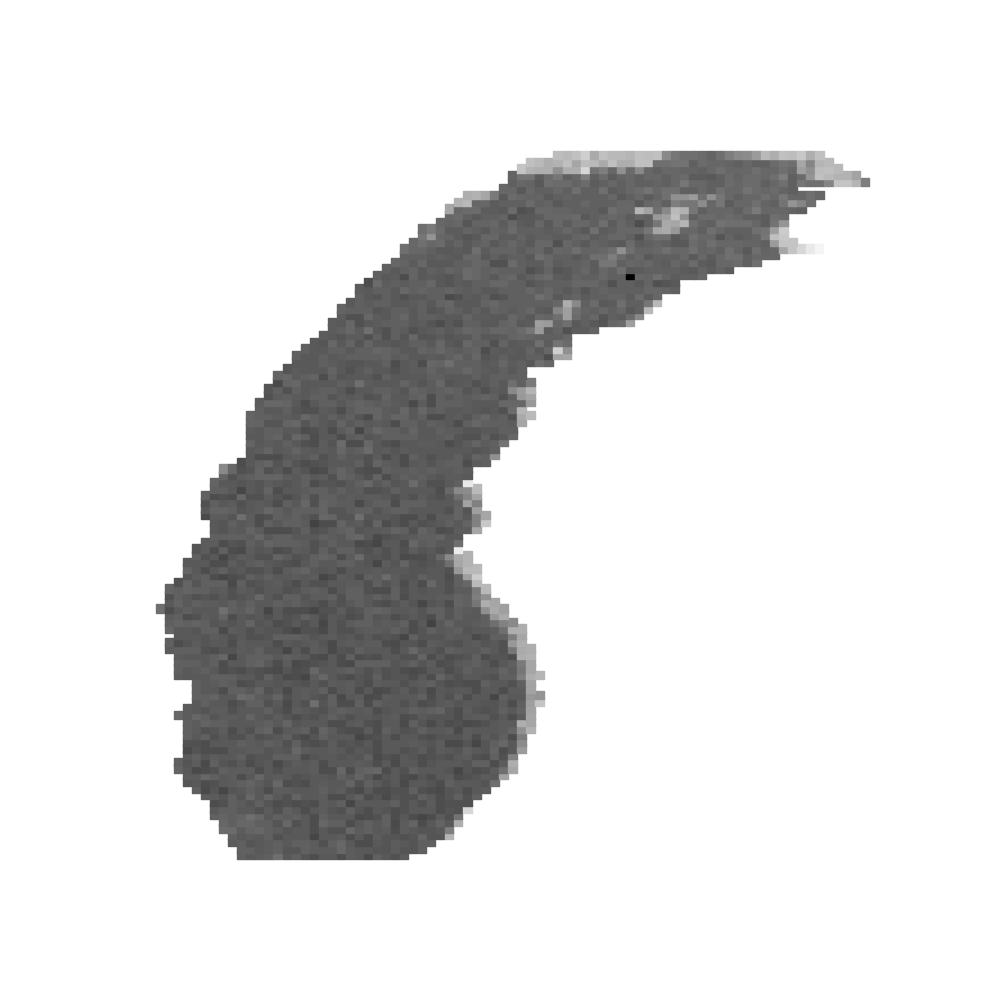

In [207]:
img = Image.open('D:/user/docs/NU/_Noctis/lake-michigan-images/6.png')
img = ImageOps.grayscale(img)
img

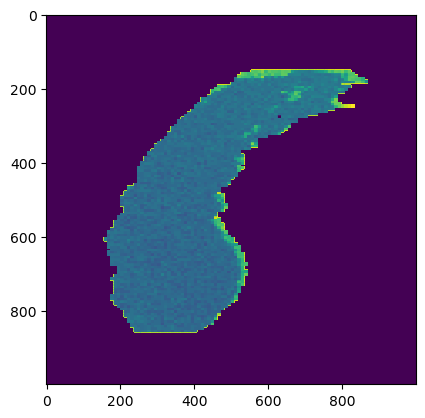

In [212]:
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out outside region
plt.imshow(newimg, interpolation='none')
plt.show()

In [199]:
(newimg)[150, 553], (newimg)[860, 408]

(245, 231)

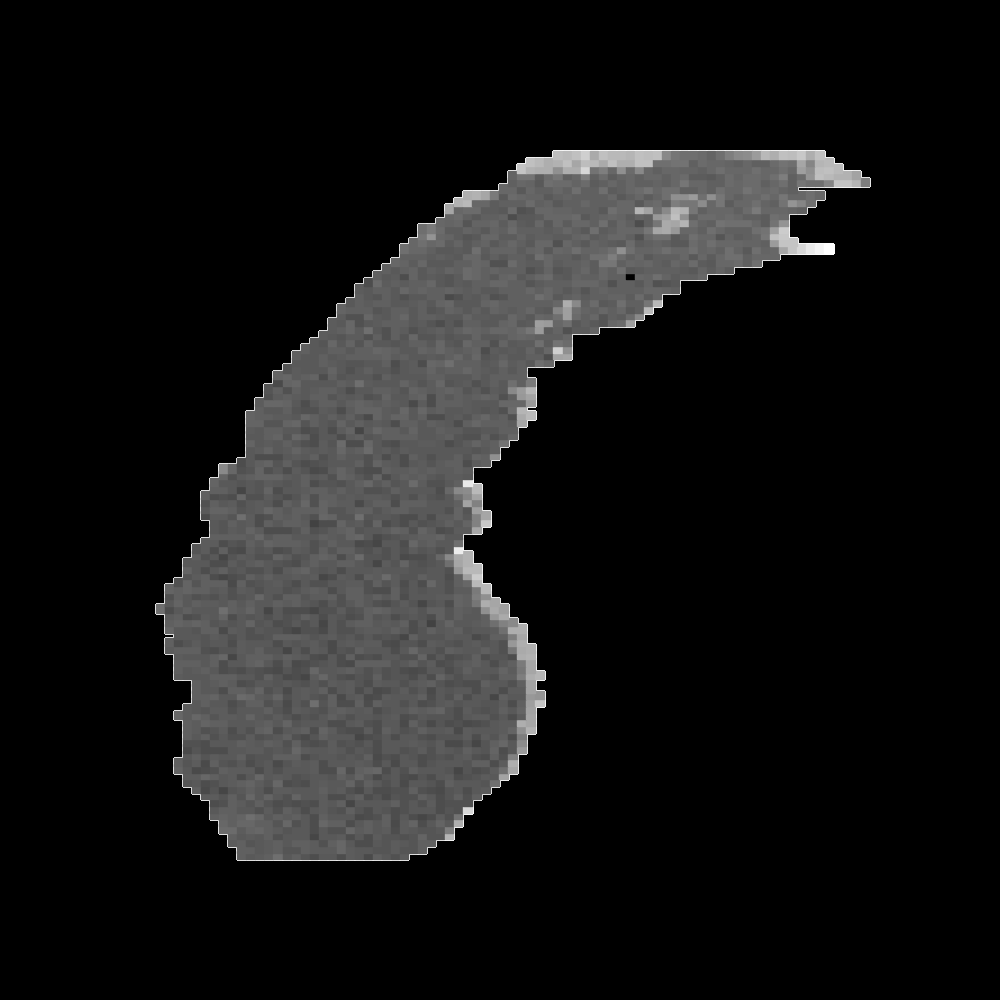

In [219]:
ImageOps.grayscale(Image.fromarray(newimg))

And this is how we save the image above:

In [220]:
ImageOps.grayscale(Image.fromarray(newimg)).save('D:/user/docs/NU/_Noctis/lake-michigan-images/sample.png')

To combine all ops:

In [222]:
f_img = 'D:/user/docs/NU/_Noctis/lake-michigan-images/6.png'
g_img = 'D:/user/docs/NU/_Noctis/lake-michigan-images/sample.png'
img = Image.open(f_img)
img = ImageOps.grayscale(img)
newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64))
newimg64.save(g_img)

So now let's repeat these operations *prior* to compressing to 64 $\times$ 64:

# Shrinking to 64 $\times$ 64
We now resize images to 64 $\times$ 64 in order to reduce network training memory requirements, with zero intensities on land and avoiding aliasing around the lake border:

In [224]:
from PIL import Image, ImageOps
f = 'D:/user/docs/NU/_Noctis/lake-michigan-images'
g = 'D:/user/docs/NU/_Noctis/lake-michigan-images-64'
for file in tqdm(os.listdir(f)):
    f_img = f + "/" + file
    g_img = g + "/" + file
    img = Image.open(f_img)
    img = ImageOps.grayscale(img)
    newimg = np.asarray(img) * mask # mask with the lake michigan mask to zero out land region
    newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.ANTIALIAS)
    newimg64.save(g_img)

  0%|          | 0/15960 [00:00<?, ?it/s]C:\Users\Dino\AppData\Local\Temp\ipykernel_6780\778164306.py:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  newimg64 = ImageOps.grayscale(Image.fromarray(newimg)).resize((64,64), Image.ANTIALIAS)
100%|█████████▉| 15959/15960 [03:32<00:00, 75.08it/s]


ValueError: operands could not be broadcast together with shapes (64,64) (1000,1000) 

I think there's still aliasing on the coastline compared to the original images, but I think this is about the best we can get.

# Optional: Limiting

# Correlations
Plotting the pearson correlation plot to visualise the correlation between various features

Text(0.5, 1.0, 'Correlation Matrix')

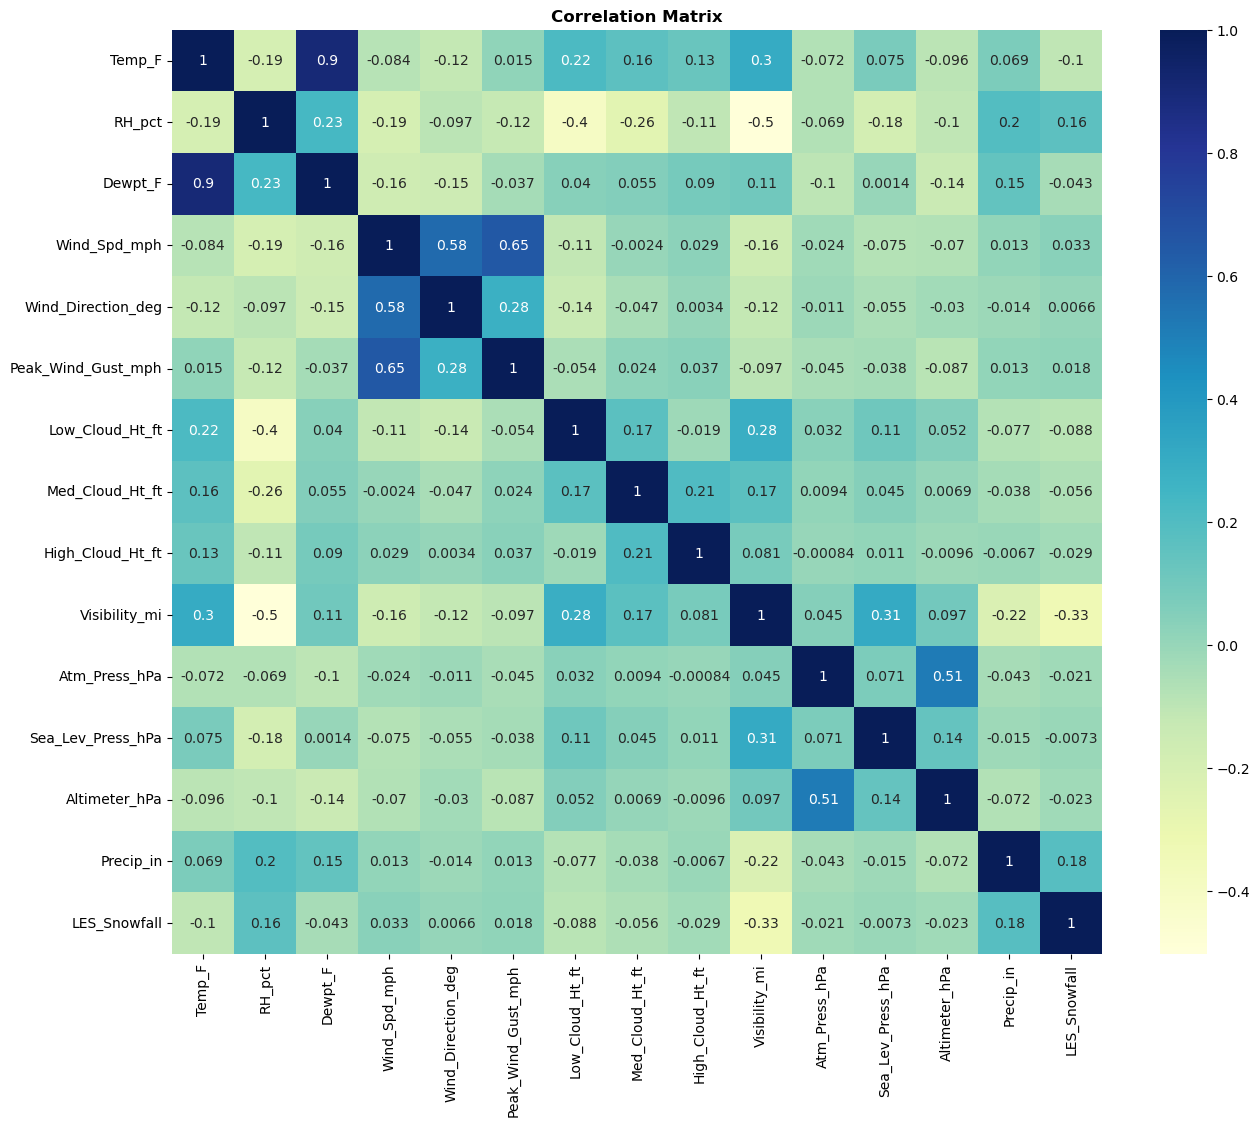

In [95]:
# Correlation 
correlation_matrix = filtered_les.corr(method = 'pearson')
plt.subplots(figsize=(15,12))

# Heatmap
sns.heatmap(correlation_matrix, annot = True, cmap = "YlGnBu")
plt.title("Correlation Matrix", size = 12, weight = 'bold')

**Observations from the above correlation plots:**
- Few features are very heavily correated with each other
- We remove the ones that have shown `positive correlation` greater than 0.6
    - **Temp_F** is highly correlated with **Dewpt_F**
    - **Wind_Spd_mph** is highly correlated with **Peak_Wind_Gust_mph**
- We also note some strong `negative correlation`, but all of them are greater than -0.6, hence we do not drop those features

We can drop the above columns since they imply to the same information, and keeping them as features will increase the model size.

In [96]:
filtered_les = filtered_les.drop(['Dewpt_F', 'Peak_Wind_Gust_mph'], axis=1)
filtered_les = filtered_les.reset_index(drop=True)

# Information about dataset shape
print('Total observations: ', filtered_les.shape[0])
print('Total number of features: ', filtered_les.shape[1])
filtered_les.head()

Total observations:  15959
Total number of features:  17


File_name_for_1D_lake  \
0  goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1  goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2  goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3  goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4  goes11.2006.10.01.1800.v01.nc-var1-t0.csv   

                             File_name_for_2D_lake  \
0  T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1  T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2  T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3  T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4  T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   

                                        Lake_data_1D  \
0  [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1  [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2  [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3  [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4  [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   

                                        Lake_data_2D  Temp_F  RH_pct  \
0  [array([       nan,        nan,        nan,   ...    60.0    49.0   
1  [array([       nan,        nan,        nan,   ...    60.0    47.0   
2  [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0   
3  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0   
4  [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0   

   Wind_Spd_mph  Wind_Direction_deg  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0            10                 270             3600                0   
1             3                   0                0                0   
2             6                  40                0                0   
3             0                   0                0                0   
4             0                   0             8000                0   

   High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0                 0             10          994.7             1017.8   
1                 0             10          994.7             1017.7   
2                 0             10          994.7             1017.8   
3                 0             10          994.7             1017.8   
4                 0             10          994.7             1017.9   

   Altimeter_hPa  Precip_in  LES_Snowfall  
0         1017.6        0.0           0.0  
1         1017.6        0.0           0.0  
2         1017.6        0.0           0.0  
3         1017.6        0.0           0.0  
4         1017.6        0.0           0.0

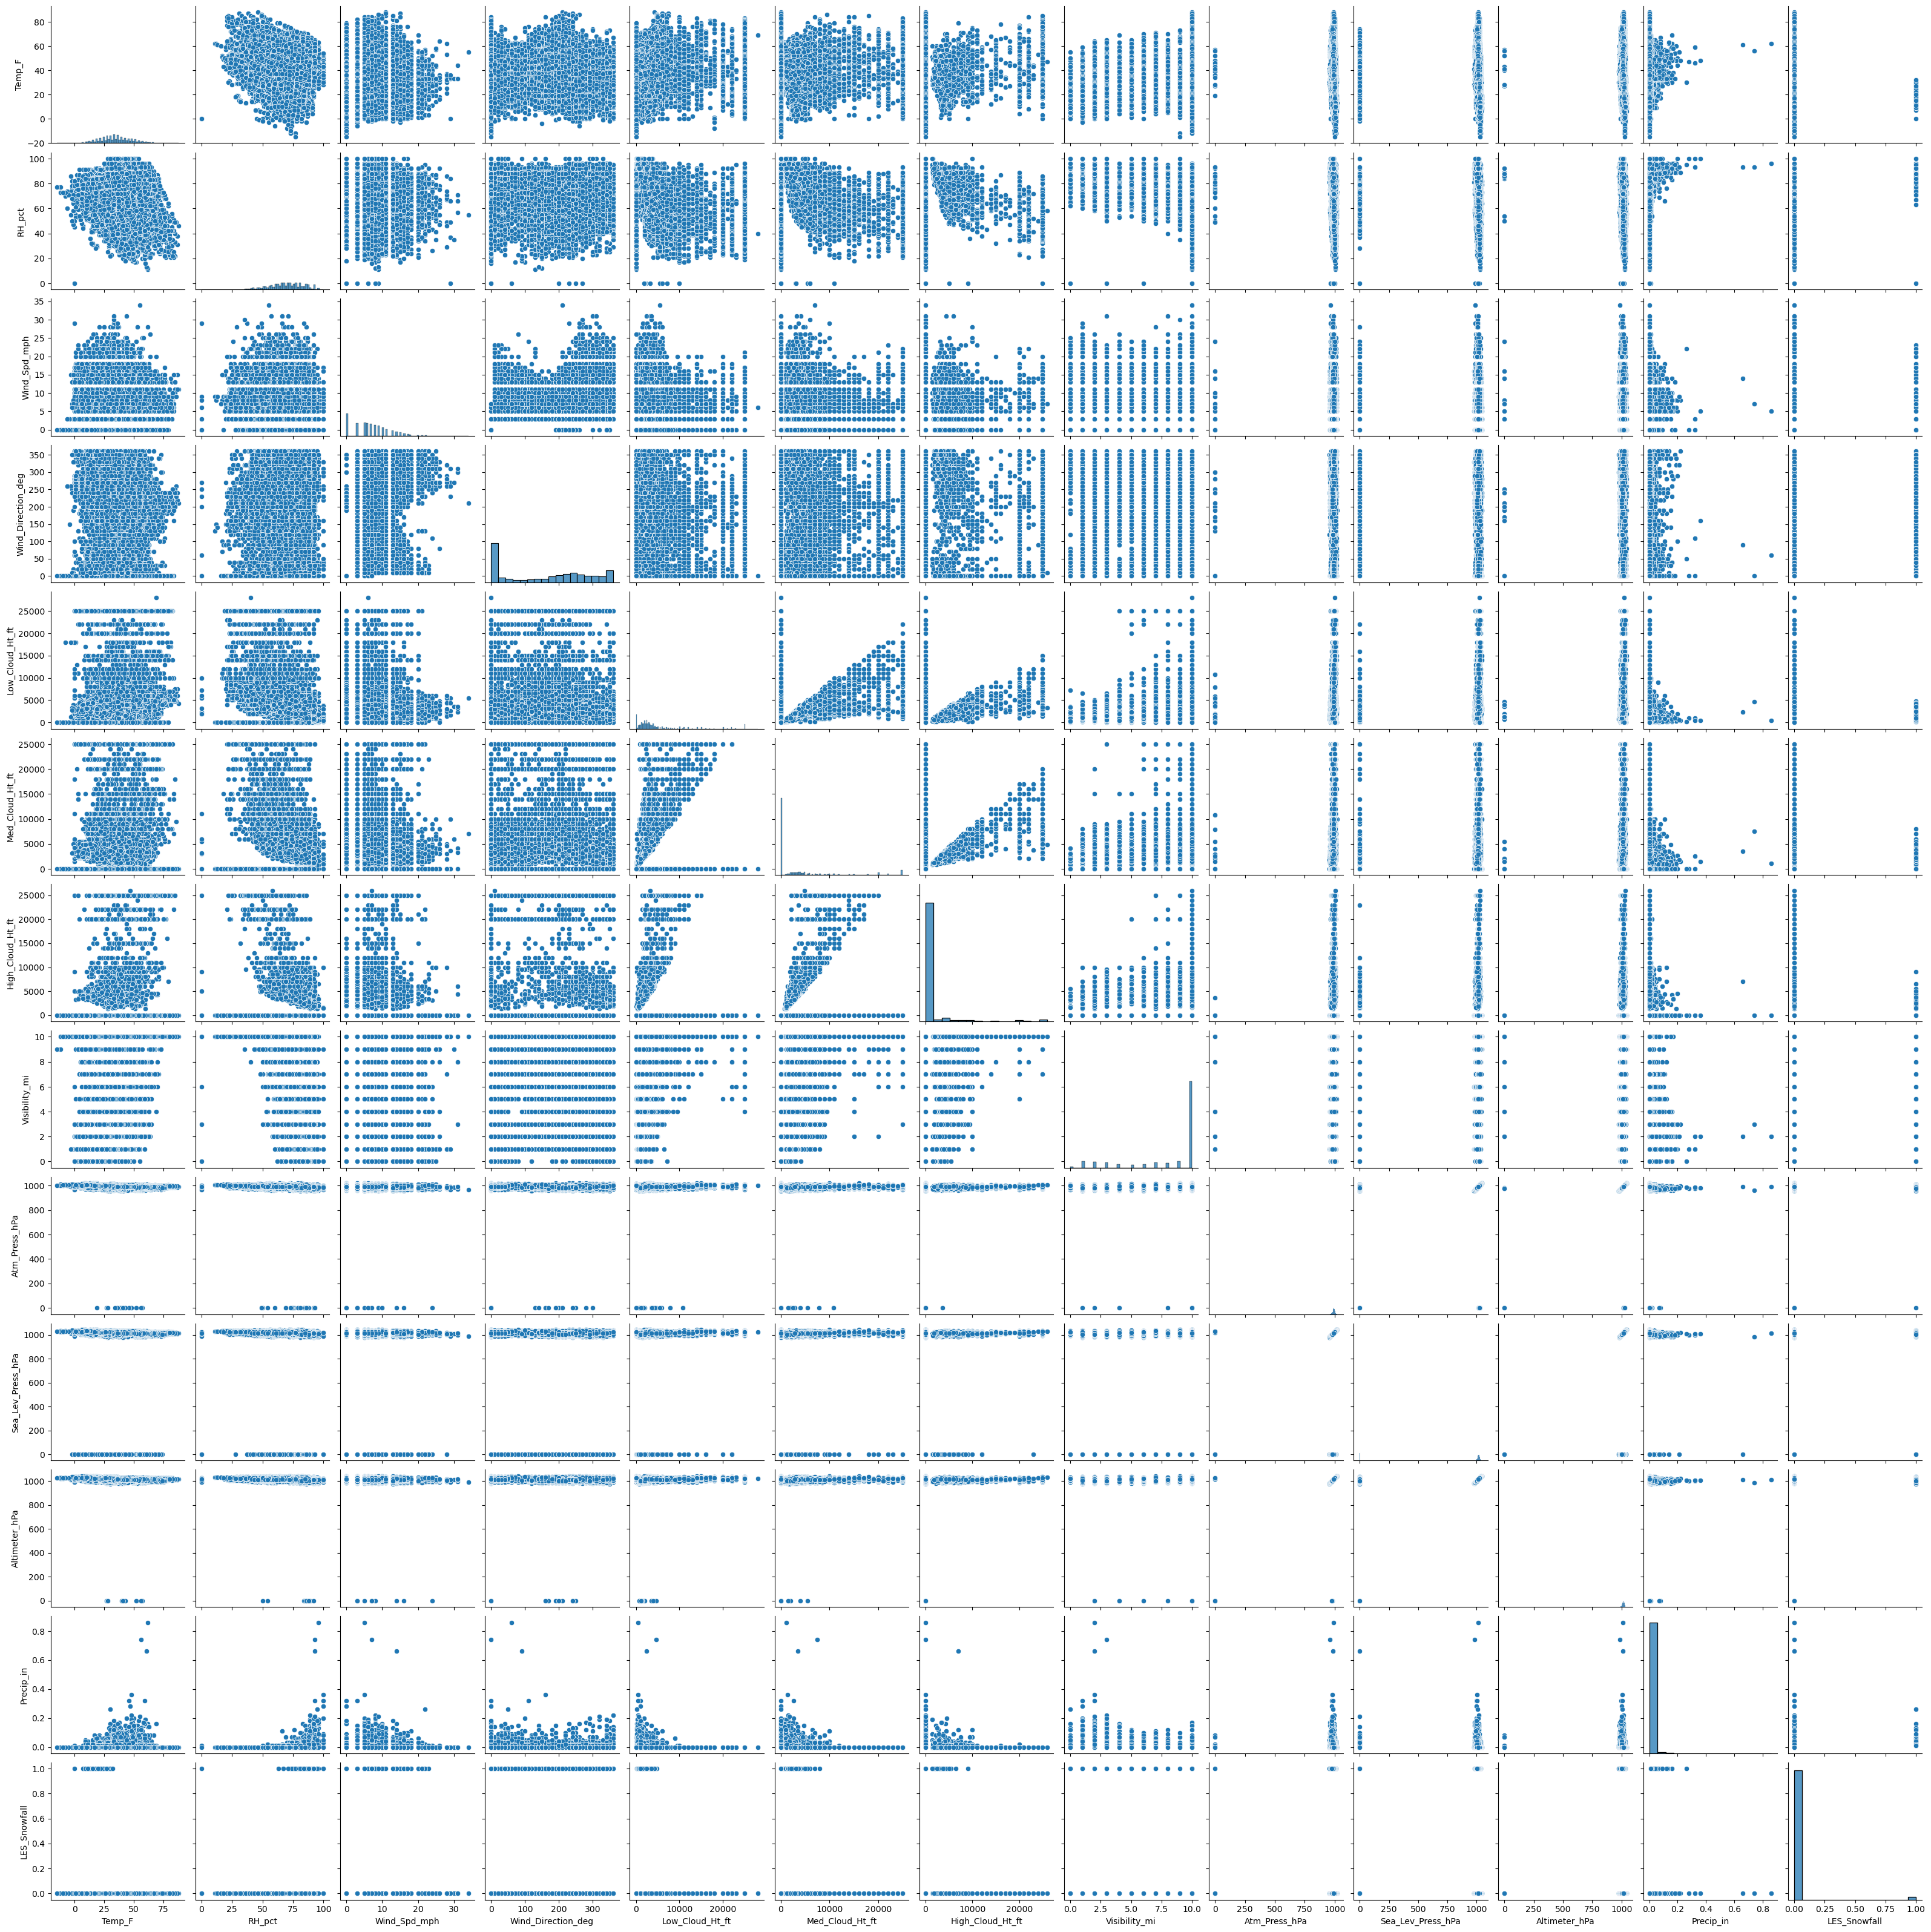

In [154]:
sns.pairplot(filtered_les)

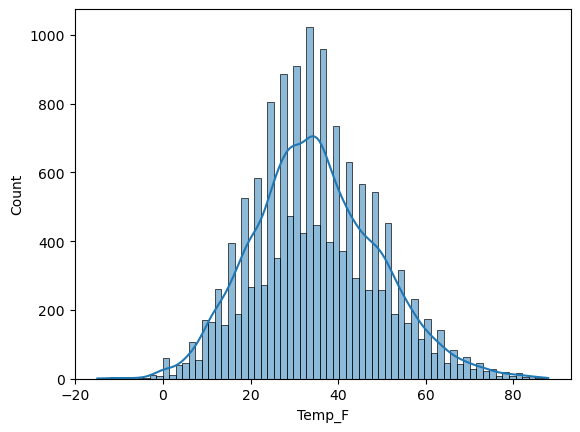

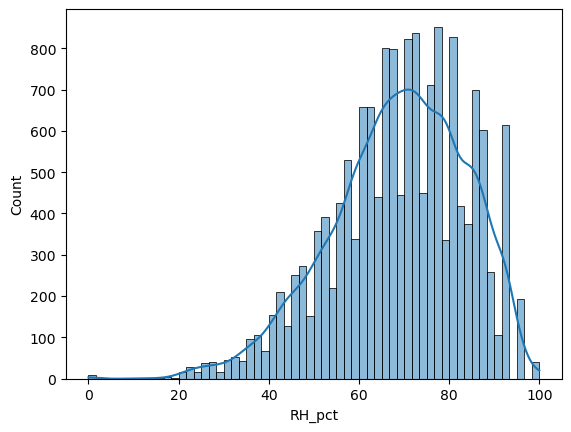

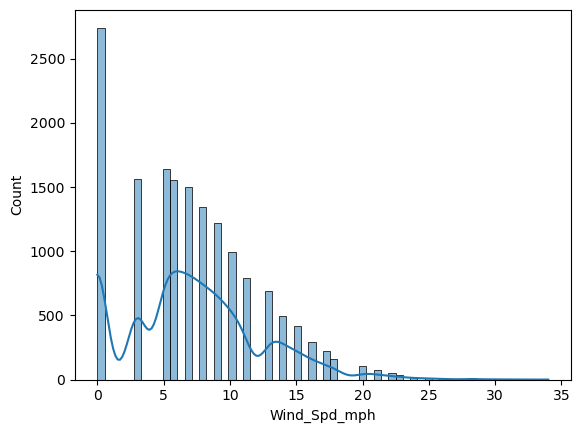

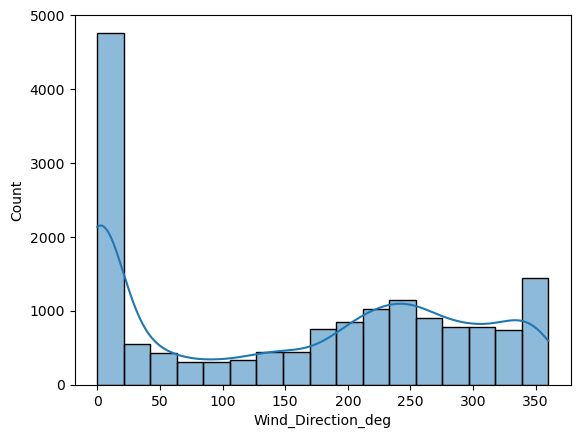

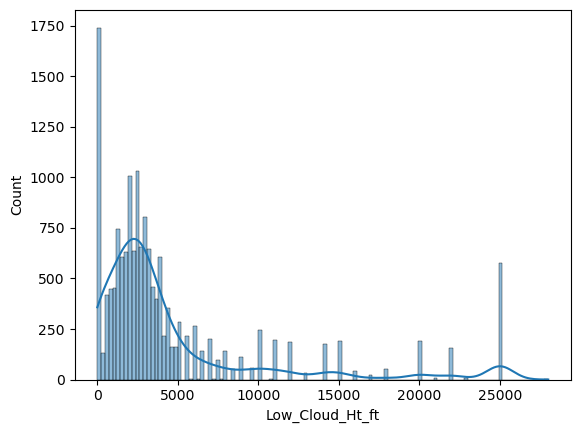

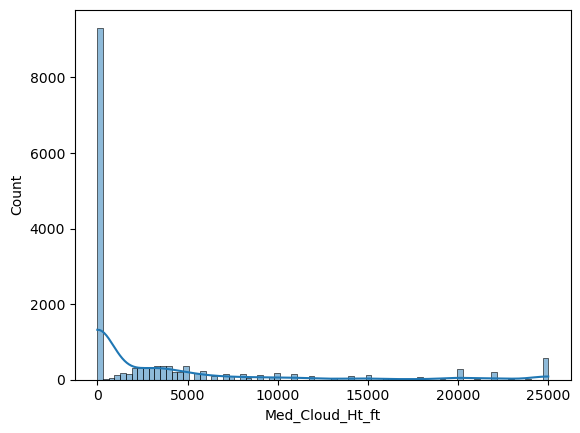

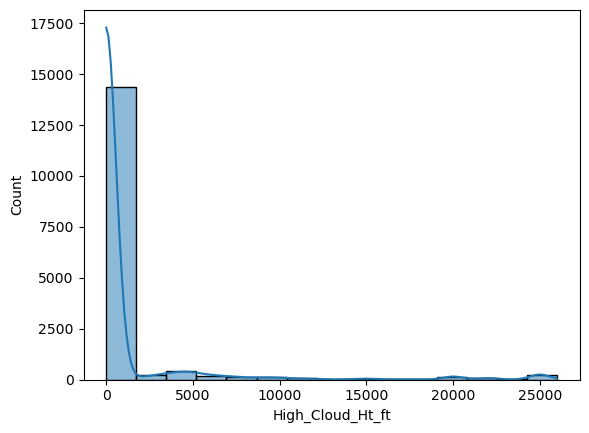

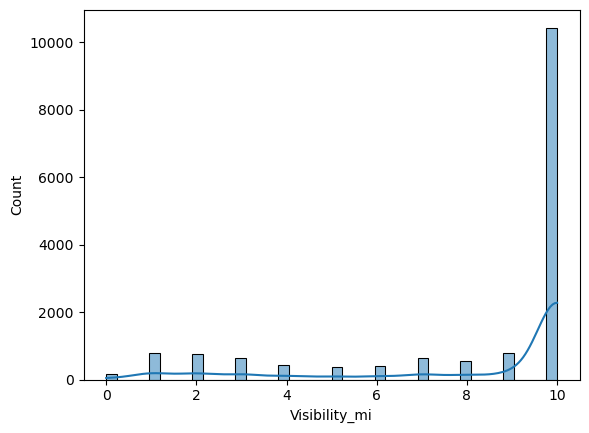

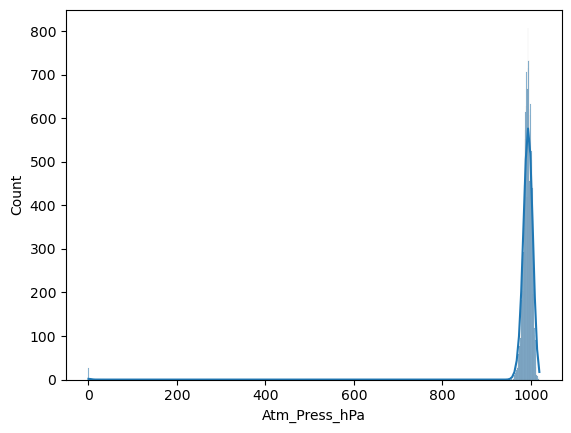

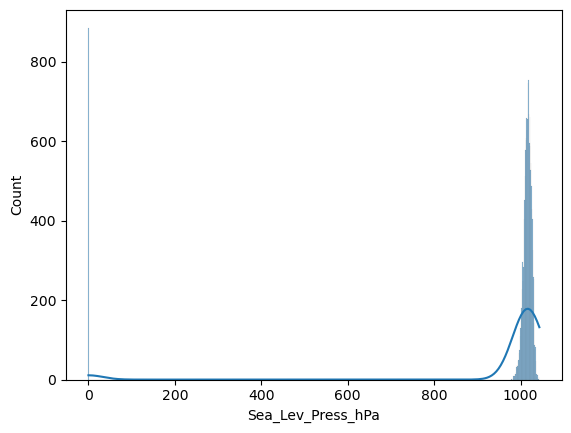

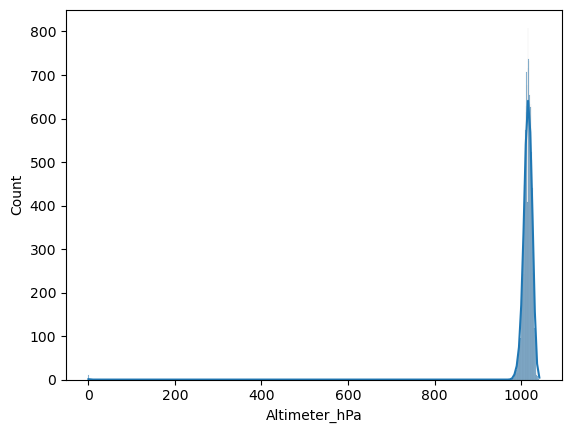

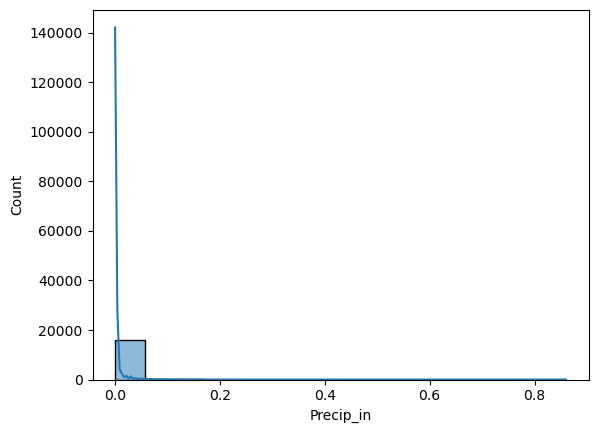

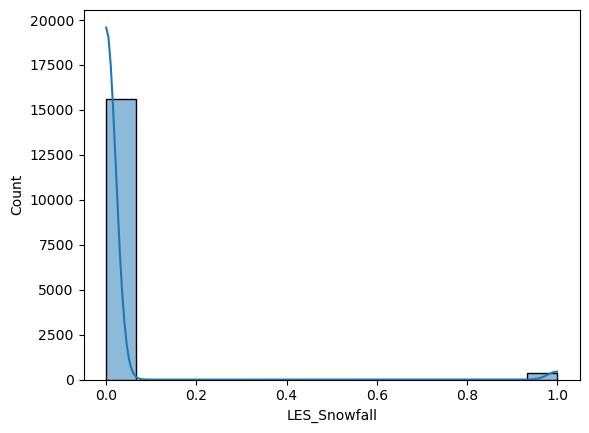

In [155]:
def distPlot(data):
    cols = data.columns[4:]
    for col in cols:
        sns.histplot(data[col], kde=True)
        plt.show()
        
distPlot(filtered_les)

In [97]:
filtered_les['LES_Snowfall'].value_counts()

0.0    15607
1.0      352
Name: LES_Snowfall, dtype: int64

<AxesSubplot:xlabel='LES_Snowfall', ylabel='count'>

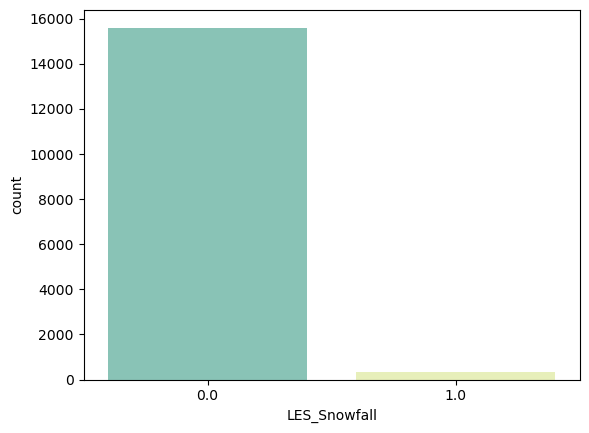

In [98]:
sns.countplot(x = filtered_les['LES_Snowfall'], palette=["#7fcdbb", "#edf8b1"])

# Feature engineering: Precipitation

In [99]:
filtered_les["Precip_in"].value_counts()

0.00    14827
0.01      509
0.02      195
0.03      142
0.04       69
0.05       48
0.06       31
0.07       31
0.09       19
0.08       16
0.10       14
0.12       10
0.15        6
0.16        6
0.13        6
0.14        6
0.11        5
0.17        3
0.32        2
0.19        2
0.18        2
0.20        2
0.26        1
0.28        1
0.36        1
0.86        1
0.66        1
0.74        1
0.22        1
0.21        1
Name: Precip_in, dtype: int64

<AxesSubplot:xlabel='Precip_in', ylabel='Count'>

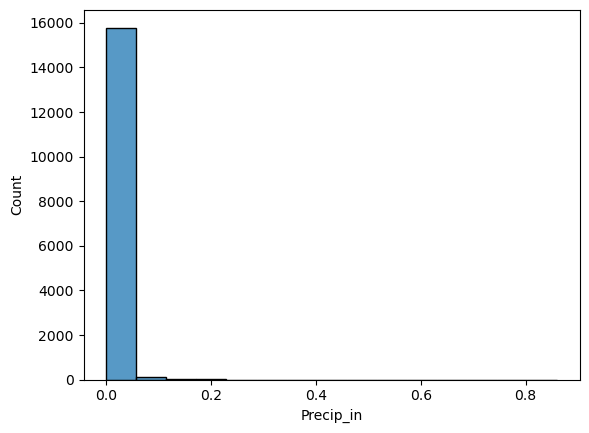

In [100]:
sns.histplot(filtered_les["Precip_in"])

In [101]:
filtered_les["Precip_in"][filtered_les["Precip_in"] > 0]

78       0.01
79       0.01
80       0.03
81       0.02
83       0.03
         ... 
15935    0.04
15936    0.01
15938    0.01
15939    0.01
15940    0.02
Name: Precip_in, Length: 1132, dtype: float64

<AxesSubplot:xlabel='Precip_in', ylabel='Count'>

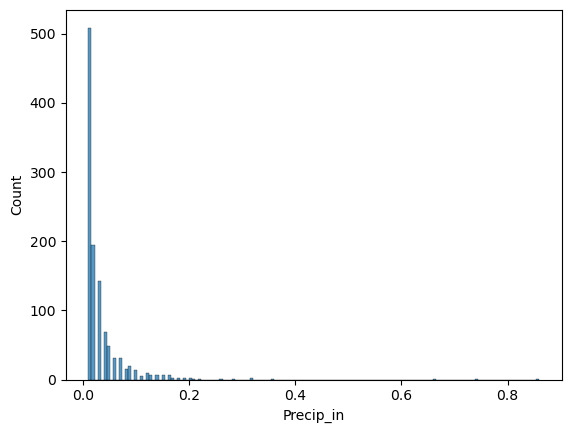

In [102]:
sns.histplot(filtered_les["Precip_in"][filtered_les["Precip_in"] > 0])

Adding a new column for precipitation:

In [103]:
filtered_les.loc[filtered_les['Precip_in'] > 0, 'LES_Precipitation'] = 1
filtered_les.loc[filtered_les['Precip_in'] <= 0, 'LES_Precipitation'] = 0
filtered_les

File_name_for_1D_lake  \
0      goes11.2006.10.01.1400.v01.nc-var1-t0.csv   
1      goes11.2006.10.01.1500.v01.nc-var1-t0.csv   
2      goes11.2006.10.01.1600.v01.nc-var1-t0.csv   
3      goes11.2006.10.01.1700.v01.nc-var1-t0.csv   
4      goes11.2006.10.01.1800.v01.nc-var1-t0.csv   
...                                          ...   
15954  goes15.2015.03.31.1700.v01.nc-var1-t0.csv   
15955  goes15.2015.03.31.1800.v01.nc-var1-t0.csv   
15956  goes15.2015.03.31.1900.v01.nc-var1-t0.csv   
15957  goes15.2015.03.31.2000.v01.nc-var1-t0.csv   
15958  goes15.2015.03.31.2100.v01.nc-var1-t0.csv   

                                 File_name_for_2D_lake  \
0      T_goes11.2006.10.01.1400.v01.nc-var1-t0.csv.csv   
1      T_goes11.2006.10.01.1500.v01.nc-var1-t0.csv.csv   
2      T_goes11.2006.10.01.1600.v01.nc-var1-t0.csv.csv   
3      T_goes11.2006.10.01.1700.v01.nc-var1-t0.csv.csv   
4      T_goes11.2006.10.01.1800.v01.nc-var1-t0.csv.csv   
...                                                ...   
15954  T_goes15.2015.03.31.1700.v01.nc-var1-t0.csv.csv   
15955  T_goes15.2015.03.31.1800.v01.nc-var1-t0.csv.csv   
15956  T_goes15.2015.03.31.1900.v01.nc-var1-t0.csv.csv   
15957  T_goes15.2015.03.31.2000.v01.nc-var1-t0.csv.csv   
15958  T_goes15.2015.03.31.2100.v01.nc-var1-t0.csv.csv   

                                            Lake_data_1D  \
0      [0.067499995, 0.07, 0.0625, 0.06, 0.0725, 0.06...   
1      [0.067499995, 0.067499995, 0.06, 0.06, 0.05749...   
2      [0.0725, 0.067499995, 0.07, 0.07, 0.067499995,...   
3      [0.067499995, 0.067499995, 0.067499995, 0.07, ...   
4      [0.085, 0.085, 0.0875, 0.0725, 0.0775, 0.0775,...   
...                                                  ...   
15954  [0.225, 0.22749999, 0.48, 0.3075, 0.1925, 0.24...   
15955  [0.2075, 0.1925, 0.18249999, 0.1625, 0.1725, 0...   
15956  [0.22, 0.1925, 0.1775, 0.16749999, 0.16499999,...   
15957  [0.2575, 0.22, 0.21249999, 0.17999999, 0.185, ...   
15958  [0.2225, 0.18249999, 0.19, 0.17999999, 0.1725,...   

                                            Lake_data_2D  Temp_F  RH_pct  \
0      [array([       nan,        nan,        nan,   ...    60.0    49.0   
1      [array([       nan,        nan,        nan,   ...    60.0    47.0   
2      [array([   nan,    nan,    nan,    nan,    nan...    59.0    55.0   
3      [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    55.0    71.0   
4      [array([   nan,    nan,    nan,    nan,    nan...    50.0    82.0   
...                                                  ...     ...     ...   
15954  [array([   nan,    nan,    nan,    nan,    nan...    39.0    54.0   
15955  [array([   nan,    nan,    nan,    nan,    nan...    37.0    61.0   
15956  [array([       nan,        nan,        nan,   ...    37.0    66.0   
15957  [array([   nan,    nan,    nan,    nan,    nan...    36.0    85.0   
15958  [array([ nan,  nan,  nan,  nan,  nan,  nan,  n...    36.0    85.0   

       Wind_Spd_mph  Wind_Direction_deg  Low_Cloud_Ht_ft  Med_Cloud_Ht_ft  \
0                10                 270             3600                0   
1                 3                   0                0                0   
2                 6                  40                0                0   
3                 0                   0                0                0   
4                 0                   0             8000                0   
...             ...                 ...              ...              ...   
15954             5                  20             7000            10000   
15955             3                 330             5500             7000   
15956            11                 310             3500             5500   
15957             0                   0             2100             2900   
15958             0                   0             4600                0   

       High_Cloud_Ht_ft  Visibility_mi  Atm_Press_hPa  Sea_Lev_Press_hPa  \
0                     0             10          994.7             1017

<AxesSubplot:xlabel='LES_Precipitation', ylabel='count'>

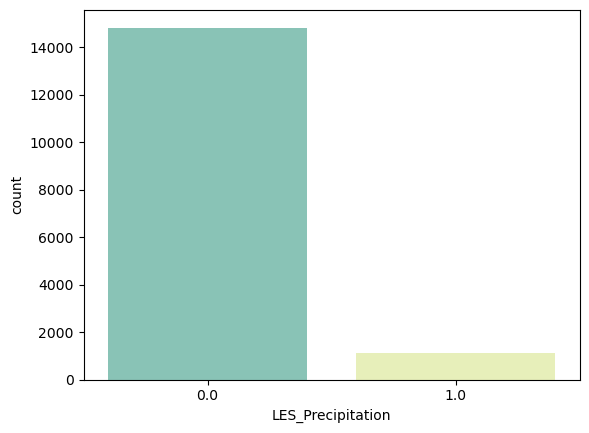

In [104]:
sns.countplot(x = filtered_les['LES_Precipitation'], palette=["#7fcdbb", "#edf8b1"])

# Predicting Cloud patterns
This means we are going to live with the nighttime discontinuity in imagery.

First, load all 64 $\times$ 64 images, with cropping of an 8-pixel border all around the lake:

In [225]:
from tqdm import tqdm
import cv2

images = []
for idx in tqdm(range(15959)):
    # im shape -> (64, 64)
    im = cv2.imread('D:/user/docs/NU/_Noctis/lake-michigan-images-64/' + str(idx) + '.png')
    # Storing 1 channel, since the images are grayscale, and cropping
    images.append(im[8:-8,8:-8,0]) 
    # images shape -> (35, 64, 64) 

100%|██████████| 15959/15959 [00:32<00:00, 492.98it/s]


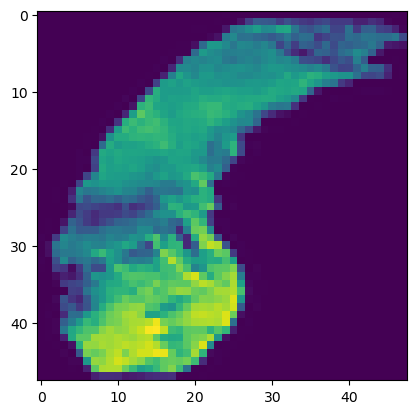

In [226]:
plt.imshow(images[146]) 

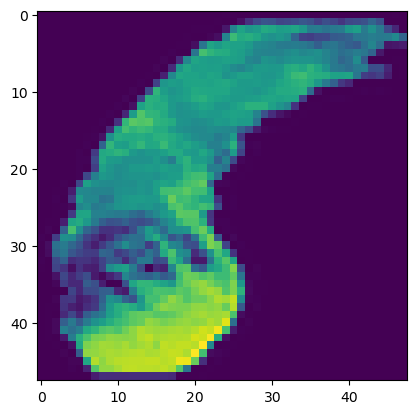

In [227]:
plt.imshow(images[147])

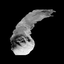

In [228]:
from PIL import Image, ImageOps
Image.open('D:/user/docs/NU/_Noctis/lake-michigan-images-64/147.png')

In [152]:
full = np.full(im.shape, 255)
mask = (full - img).astype(np.uint8)
mask = (0 < mask).astype(int)
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Cloud Sequence Visualization

Our data consists of sequences of frames, each of which
are used to predict the upcoming frame. Let's take a look
at some of these sequential frames.

>**Note**: Do not run the next cell because it shows an example that includes corrupt images (ones with just nans):

Displaying next frames starting at image 11491.


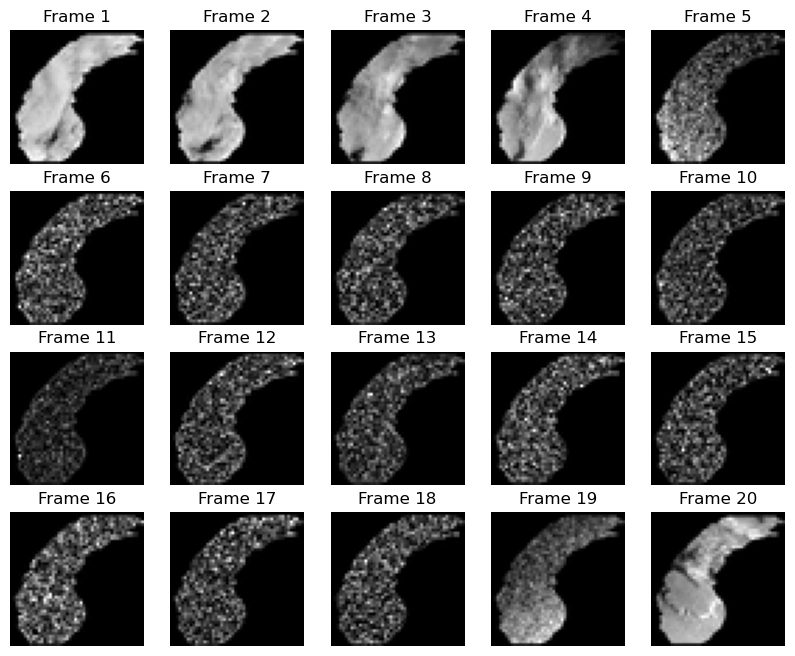

In [230]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(images)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

Run this one instead, whcih displays a valid sequence of images:

Displaying next frames starting at image 4446.


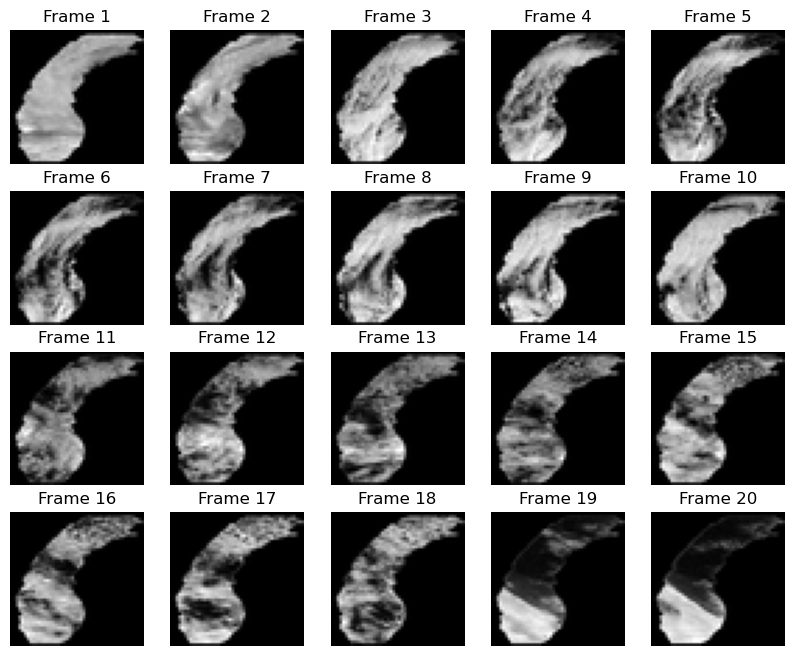

In [231]:
# Construct a figure on which we will visualize the images.
fig, axes = plt.subplots(4, 5, figsize=(10, 8))

# Plot each of the sequential images for one random data example.
data_choice = np.random.choice(range(len(images)), size=1)[0]
for idx, ax in enumerate(axes.flat):
    ax.imshow(images[data_choice + idx], cmap="gray")
    ax.set_title(f"Frame {idx + 1}")
    ax.axis("off")

# Print information and display the figure.
print(f"Displaying next frames starting at image {data_choice}.")
plt.show()

Since daytime only consists of 7 hours, this image sequence of length 20 obligatorily includes nighttimes. In other words, there is an image above that jumps over nighttime and thus is more discontinuous in cloud cover.

20 images is about 3 days (3 $\times$ 7). 

As an exercise, let's see if based on 6 hours of cloud cover, we can predict the 7th hour.

We are going to use 6 sequential images as the input, and the next (shifted by 1) 6 images as output.